# OpenCV 기반으로 블록, 선 탐지

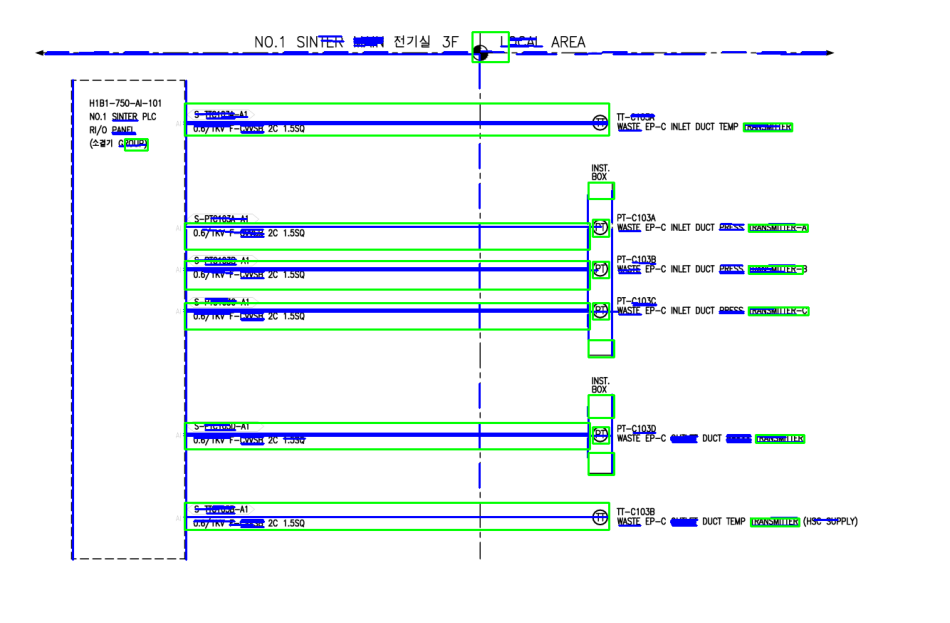

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '../data/easy_task_test05_v1.PNG'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(image)
_, binary = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)         # 이진화 (선명한 선 강조)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))) # 노이즈 제거
image_color = cv2.imread(image_path)

# Line Detection : Hough Transform
edges = cv2.Canny(binary, 50, 150, apertureSize=3)      # 엣지 검출기..
lines = cv2.HoughLinesP(
    edges,
    rho=1,                                  # 거리 해상도(픽셀 단위)
    theta=np.pi/180,                        # 각도 해상도(라디안)
    threshold=50,                           # 임계값(직선으로 판단할 기준)
    minLineLength=30,
    maxLineGap=5                            # 직선으로 연결 가능한 최대 점 간격?
)

# 블록 : Contours 사용
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w*h > 500:  # 너무 작은 노이즈 제외
        rects.append((x, y, w, h))

# 라인 그리기 (파랑)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_color, (x1, y1), (x2, y2), (255, 0, 0), 2)

# 블록 그리기 (초록)
for rect in rects:
    x, y, w, h = rect
    cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Matplotlib로 안전하게 시각화
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()